<a href="https://colab.research.google.com/github/raichalvarghese/Data_Science_Lab/blob/master/Imagenet_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***VGG16***

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import datasets, layers, models, losses
from keras.layers import Conv2D, MaxPooling2D

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [5]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/5
65/65 [==============================] - 580s 9s/step - loss: 2.0050 - accuracy: 0.4788 - val_loss: 1.1267 - val_accuracy: 0.5895
Epoch 2/5
65/65 [==============================] - 587s 9s/step - loss: 0.7658 - accuracy: 0.7270 - val_loss: 1.0786 - val_accuracy: 0.6712
Epoch 3/5
65/65 [==============================] - 574s 9s/step - loss: 0.5436 - accuracy: 0.8000 - val_loss: 1.0515 - val_accuracy: 0.6634
Epoch 4/5
65/65 [==============================] - 574s 9s/step - loss: 0.3666 - accuracy: 0.8662 - val_loss: 0.9585 - val_accuracy: 0.7023
Epoch 5/5
65/65 [==============================] - 575s 9s/step - loss: 0.2438 - accuracy: 0.9187 - val_loss: 1.0386 - val_accuracy: 0.7023


Text(0.5, 0, 'Epoch')

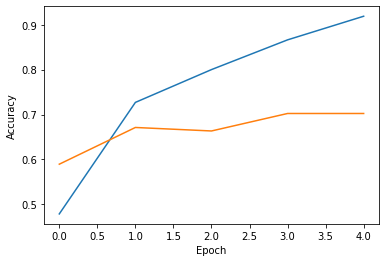

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

**Lenet**

In [20]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

train_ds = tf.image.resize(train_ds, (28, 28))
test_ds = tf.image.resize(test_ds, (28, 28))


model = Sequential()

# Convolutional layer  
model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu', input_shape = (28,28,3)))

# Max-pooing layer with pooling window size is 2x2
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer 
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))

# Max-pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten layer 
model.add(Flatten())

# The first fully connected layer 
model.add(Dense(120, activation = 'relu'))

# The output layer  
model.add(Dense(5, activation = 'softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history2 = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/50
65/65 [==============================] - 3s 36ms/step - loss: 5.6053 - accuracy: 0.2350 - val_loss: 2.0448 - val_accuracy: 0.2665
Epoch 2/50
65/65 [==============================] - 2s 33ms/step - loss: 1.6806 - accuracy: 0.2920 - val_loss: 1.7174 - val_accuracy: 0.2802
Epoch 3/50
65/65 [==============================] - 2s 33ms/step - loss: 1.4974 - accuracy: 0.3489 - val_loss: 1.6320 - val_accuracy: 0.3268
Epoch 4/50
65/65 [==============================] - 2s 32ms/step - loss: 1.3572 - accuracy: 0.4156 - val_loss: 1.6557 - val_accuracy: 0.3307
Epoch 5/50
65/65 [==============================] - 2s 33ms/step - loss: 1.2235 - accuracy: 0.4895 - val_loss: 1.5912 - val_accuracy: 0.4125
Epoch 6/50
65/65 [==============================] - 2s 33ms/step - loss: 1.1282 - accuracy: 0.5372 - val_loss: 1.5737 - val_accuracy: 0.3930
Epoch 7/50
65/65 [==============================] - 2s 31ms/step - loss: 1.0218 - accuracy: 0.5966 - val_loss: 1.6510 - val_accuracy: 0.3891
Epoch 8/50
65

Text(0.5, 0, 'Epoch')

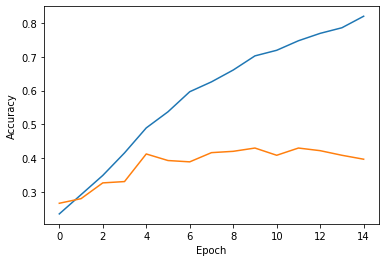

In [22]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

**Alexnet**

In [23]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=train_ds.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history2 = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 256)         614656    
                                                      

Text(0.5, 0, 'Epoch')

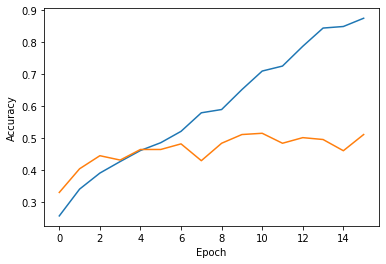

In [24]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses
from keras.layers import Conv2D, MaxPooling2D

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [31]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [39]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

x_train = tf.image.resize(x_train, (28, 28))
x_test = tf.image.resize(x_test, (28, 28))





In [56]:
model = Sequential()

# Convolutional layer  
model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                  activation = 'relu', input_shape = x_train[0].shape))

# Max-pooing layer with pooling window size is 2x2
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer 
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))

# Max-pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten layer 
model.add(Flatten())

# The first fully connected layer 
model.add(Dense(120, activation = 'relu'))

# The output layer  
model.add(Dense(1, activation = 'softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)



In [57]:
 history = model.fit(x_train,y_train,)

 307/1563 [====>.........................] - ETA: 35s - loss: 0.0000e+00 - accuracy: 0.0965

KeyboardInterrupt: ignored